# KNN CLUSTERING


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans    # KMEANS CLUSTERING
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")



# CRIMEDATASET CLUSTERING

crimedata = pd.read_csv("crime_data.csv")

In [3]:
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crimedata.isna().sum()  # NO NULL VALUES 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crimedata.shape

(50, 5)

In [6]:
features = crimedata.iloc[:,1:5]   # EXTRACTING JUST THE FEATURES

In [7]:
features.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
features.corr()  

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<Axes: >

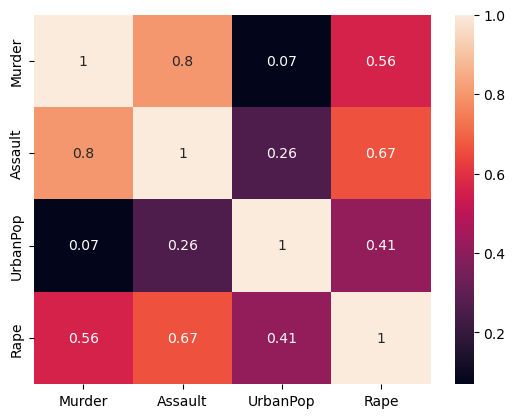

In [9]:
sns.heatmap(data=features.corr(), annot=True)
# MURDER AND ASSUALT HAS HIGH CORRELATION

In [202]:
# To check for outliers using boxplot

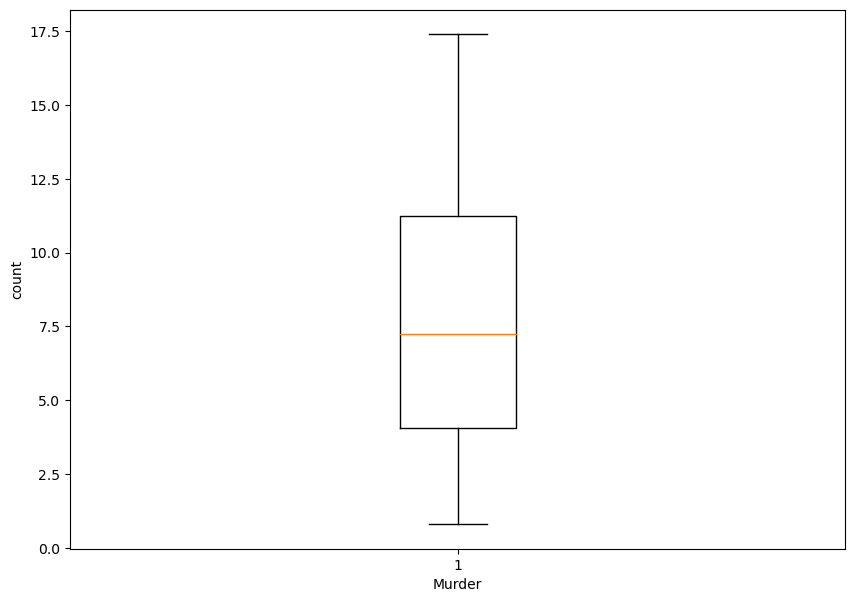

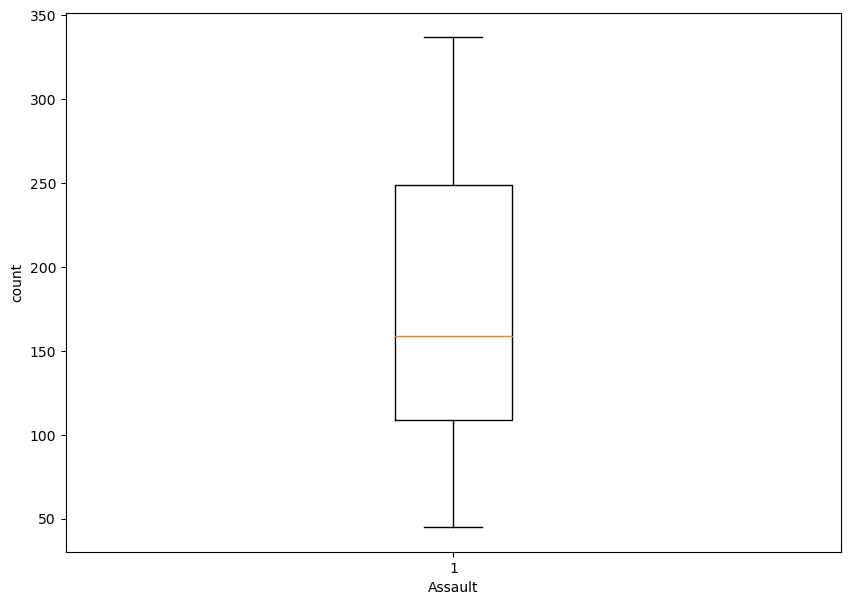

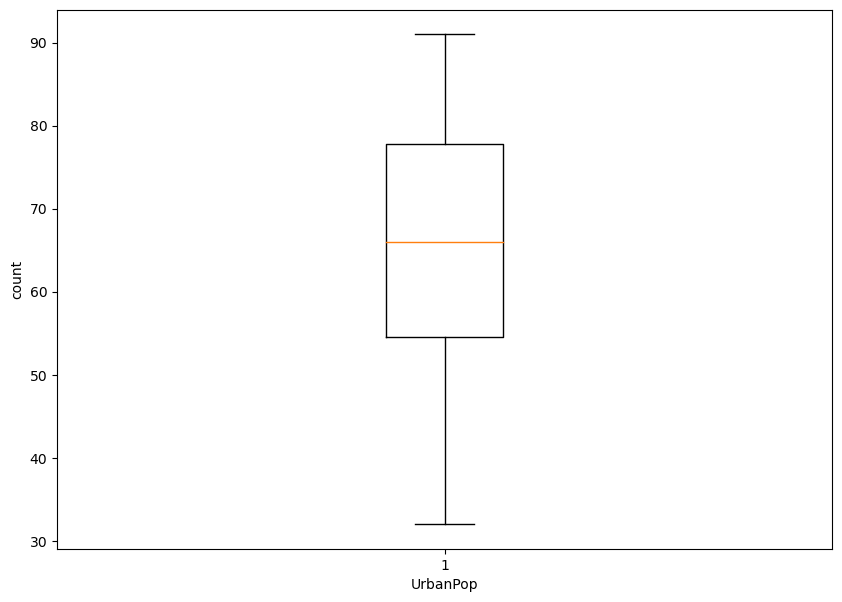

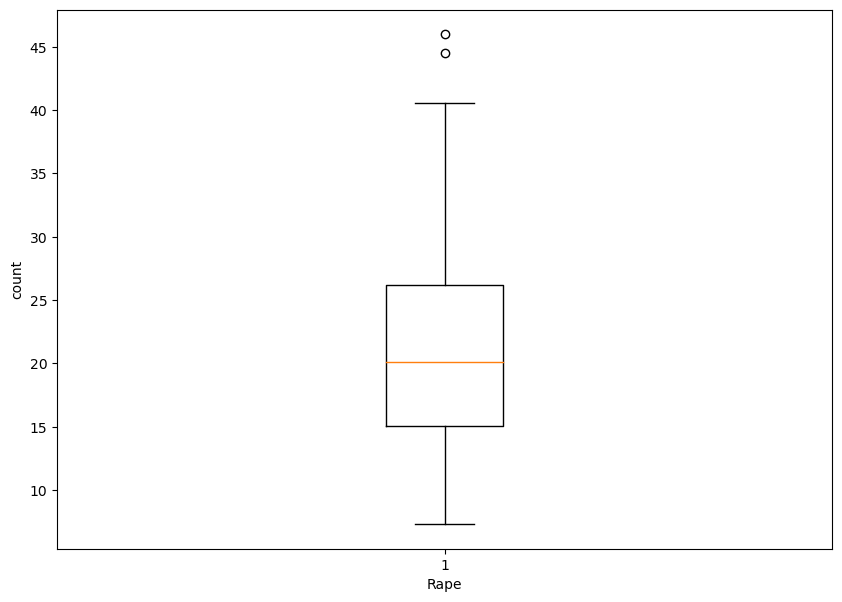

In [10]:
columns = list(features.columns)

for i in columns:
    plt.figure(figsize=(10,7))
    plt.boxplot(features[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    

From the above boxplot we can infer that the column "rape"has some amount of outliers. 

Outliers can  significantly affect the clustering, potentially leading to high inertia.

Ideally Standscaler and Robust scaler is ideal for such kind of data.

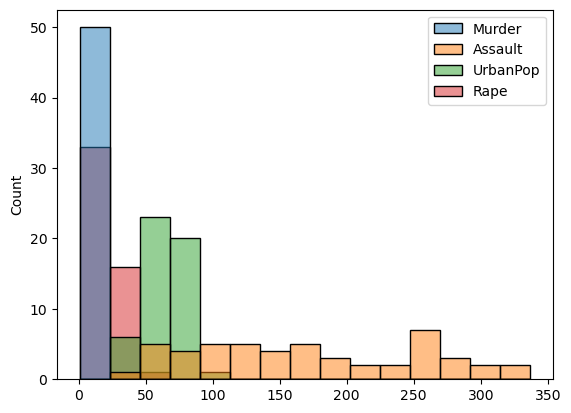

In [11]:
sns.histplot(features)
plt.show()

# Not a gaussian distribution


# Scalers and its significance:
'''

StandardScaler scales the data to have a mean of 0 and a standard deviation of 1. 
It is suitable when your data follows a roughly Gaussian distribution and doesn't have outliers.

MinMaxScaler can be effective, especially when the data doesn't
have a Gaussian distribution, but it doesn't handle outliers well. 
Outliers can still significantly affect the clustering, potentially leading to high inertia.

RobustScaler is robust to outliers and can help reduce their influence on clustering. 
If your data has outliers that you don't want to heavily affect the clustering results,
RobustScaler may be a good choice.

CONSIDERING OUR DATASET . IT WILL BE APPROPRIATE TO GO WITH THE STANDARDSCALER OR ROBUST SCALER
'''

In [12]:
scaler = MinMaxScaler()
mmscaler = scaler.fit_transform(features)

In [13]:
mmscaler

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [14]:
Model1 = KMeans(n_clusters=3)
pred = Model1.fit_predict(mmscaler)

In [15]:
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [16]:
crimedata["cluster"] = pred

In [17]:
print(Model1.cluster_centers_)

[[0.69467343 0.73395818 0.61552186 0.56629947]
 [0.31425703 0.33866058 0.68361582 0.31122595]
 [0.1686747  0.11485774 0.34028683 0.12601868]]


In [18]:
data1 = crimedata[crimedata["cluster"]==0]
data2 = crimedata[crimedata["cluster"]==1]
data3 = crimedata[crimedata["cluster"]==2]

In [19]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [20]:
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
20,Massachusetts,4.4,149,85,16.3,1
24,Missouri,9.0,178,70,28.2,1
29,New Jersey,7.4,159,89,18.8,1
34,Ohio,7.3,120,75,21.4,1


In [21]:
data3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


# EVALUATING USING KNN : Elbow method  : Minmax scaler

In [22]:
inertia = []
for i in range(1,11):
    Model1 = KMeans(n_clusters=i)
    pred = Model1.fit_predict(mmscaler)
    inertia.append(Model1.inertia_)

In [23]:
print(Model1.cluster_centers_)


[[0.60240964 0.6010274  0.80932203 0.48191214]
 [0.21428571 0.14138943 0.64891041 0.20413437]
 [0.8253012  0.84474886 0.23163842 0.29112834]
 [0.11370482 0.09246575 0.25847458 0.08074935]
 [0.65421687 0.85205479 0.71525424 0.62739018]
 [0.25       0.34075342 0.83898305 0.30189492]
 [0.53614458 0.68150685 0.8700565  0.89061154]
 [0.84337349 0.60273973 0.48728814 0.43217054]
 [0.38286479 0.37328767 0.49340866 0.3126615 ]
 [0.55421687 0.74657534 0.27118644 0.96124031]]


Text(0, 0.5, 'Inertia Score')

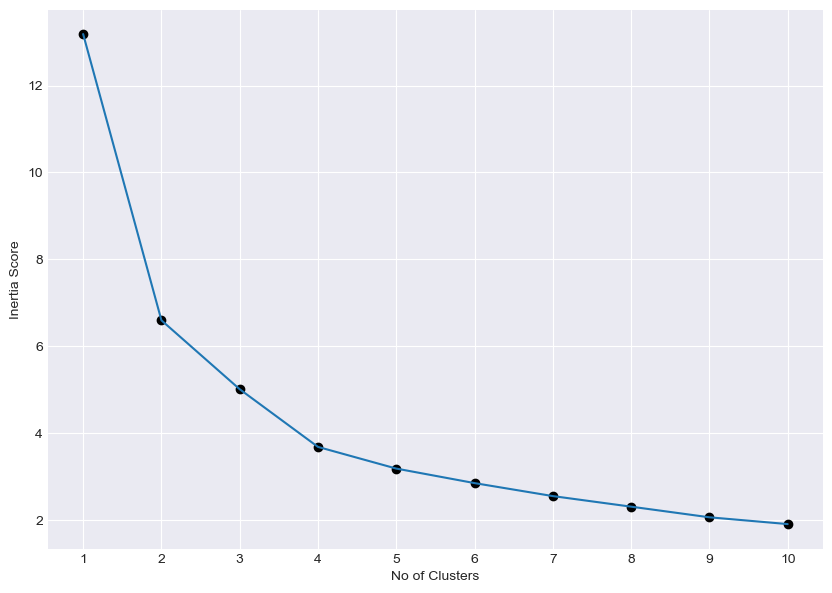

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(range(1,11),inertia,color="black")
plt.style.use("seaborn-darkgrid")
plt.plot(range(1,11),inertia)
plt.xticks(range(1,11))
plt.style.use("seaborn-darkgrid")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia Score")


HENCE WE INFER THAT WHEN THE NO OF CLUSTERS IS 3 THE INERTIA IS LESS.
INTERTIA IS THE DISTANCE BETWEEN A DATAPOINT AND THE CLUSTER CENTER WHICH SHOULD BE MINIMUM . HERE AT THE ELBOW BEND IS AT 3 AFTER WHICH THE REDUCTION IN INERTIA IS NEGLIGIBLE . HENCE WE GO WITH NO OF CLUSTERS = 3

# # EVALUATING USING KNN : Elbow method  : Standard scaler

In [26]:
scaler = StandardScaler()
SScaler = scaler.fit_transform(features)

In [27]:
inertia = []
for i in range(1,11):
    Model2 = KMeans(n_clusters=i)
    pred = Model2.fit_predict(SScaler)
    inertia.append(Model2.inertia_)

Text(0, 0.5, 'Inertia Score')

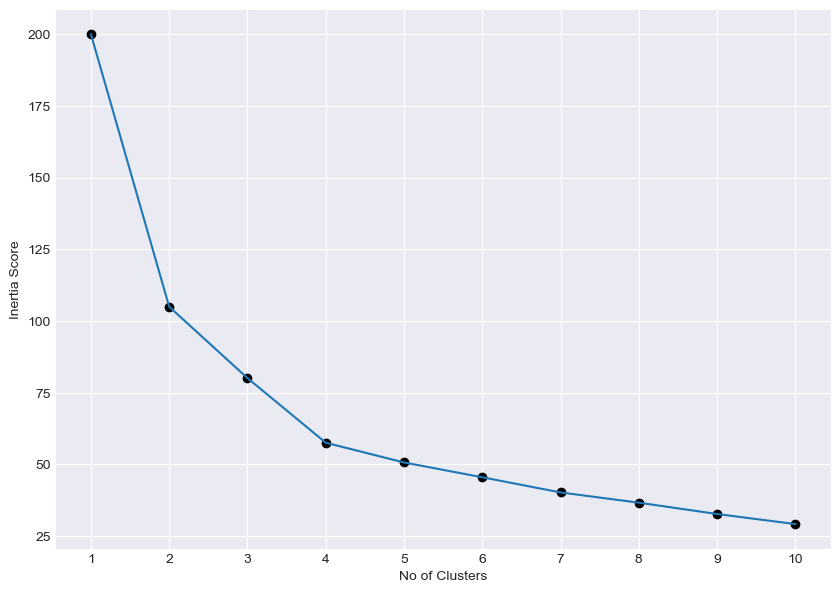

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(range(1,11),inertia,color="black")
plt.style.use("seaborn-darkgrid")
plt.plot(range(1,11),inertia)
plt.xticks(range(1,11))
plt.style.use("seaborn-darkgrid")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia Score")

# # # EVALUATING USING KNN : Elbow method  : Robust scaler

In [29]:
scaler = RobustScaler()
RobScaler = scaler.fit_transform(features)


In [30]:
inertia = []
for i in range(1,11):
    Model3 = KMeans(n_clusters=i)
    pred = Model3.fit_predict(RobScaler)
    inertia.append(Model3.inertia_)

Text(0, 0.5, 'Inertia Score')

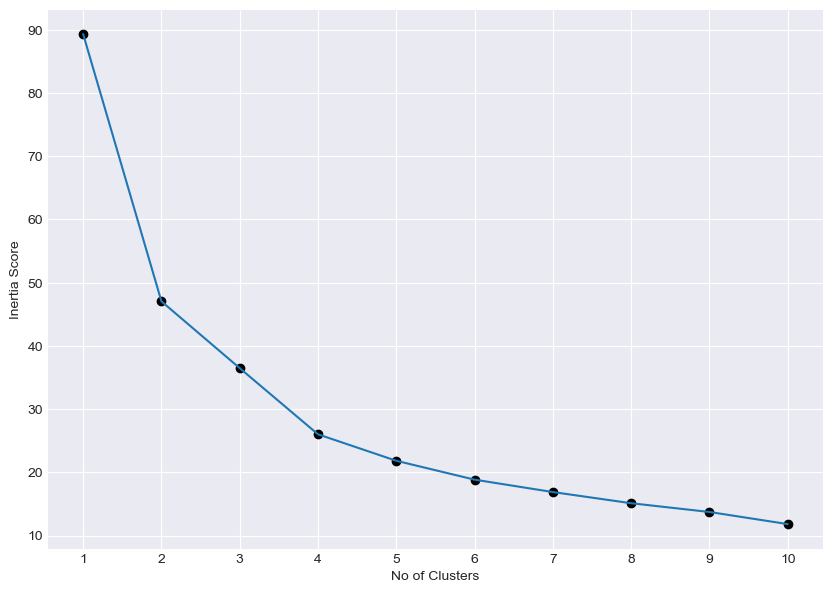

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(range(1,11),inertia,color="black")
plt.style.use("seaborn-darkgrid")
plt.plot(range(1,11),inertia)
plt.xticks(range(1,11))
plt.style.use("seaborn-darkgrid")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia Score")

In [32]:
from sklearn.cluster import AgglomerativeClustering   # FOR HEIRARCHICAL CLUSTERING

# AGGLOMERATIVE CLUSTERING CRIME DATA 

In [33]:
model = AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
pred2 = model.fit_predict(mmscaler)

In [34]:
pred2

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [35]:
crimedata["H_cluster"] = pred2

In [36]:
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,H_cluster
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,0


In [37]:
Hdata1 = crimedata[crimedata["H_cluster"]==0]
Hdata2 = crimedata[crimedata["H_cluster"]==1]
Hdata3 = crimedata[crimedata["H_cluster"]==2]


In [38]:
Hdata1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,H_cluster
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,0
12,Illinois,10.4,249,83,24.0,0,0
17,Louisiana,15.4,249,66,22.2,0,0
19,Maryland,11.3,300,67,27.8,0,0


In [39]:
Hdata2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,H_cluster
3,Arkansas,8.8,190,50,19.5,1,1
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
10,Hawaii,5.3,46,83,20.2,1,1
13,Indiana,7.2,113,65,21.0,1,1
15,Kansas,6.0,115,66,18.0,1,1
16,Kentucky,9.7,109,52,16.3,2,1
20,Massachusetts,4.4,149,85,16.3,1,1
22,Minnesota,2.7,72,66,14.9,2,1
29,New Jersey,7.4,159,89,18.8,1,1


In [40]:
Hdata3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,H_cluster
11,Idaho,2.6,120,54,14.2,2,2
14,Iowa,2.2,56,57,11.3,2,2
18,Maine,2.1,83,51,7.8,2,2
25,Montana,6.0,109,53,16.4,2,2
26,Nebraska,4.3,102,62,16.5,2,2
28,New Hampshire,2.1,57,56,9.5,2,2
33,North Dakota,0.8,45,44,7.3,2,2
40,South Dakota,3.8,86,45,12.8,2,2
44,Vermont,2.2,48,32,11.2,2,2
47,West Virginia,5.7,81,39,9.3,2,2


# EVALUATION USING HEIRARACHICAL

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
nc = range(2,11)
silscore = []

for i in nc:
    model1 = AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="complete")
    #pred = model.fit_predict(scaled_features)
    silscore.append(silhouette_score(mmscaler,model1.fit_predict(mmscaler)))


[0.42364457559625074,
 0.30877213909512063,
 0.30607294424263076,
 0.3056360903608855,
 0.27284356597794224,
 0.2738764216820654,
 0.24780604916967502,
 0.2400551166172383,
 0.20643912850693216]

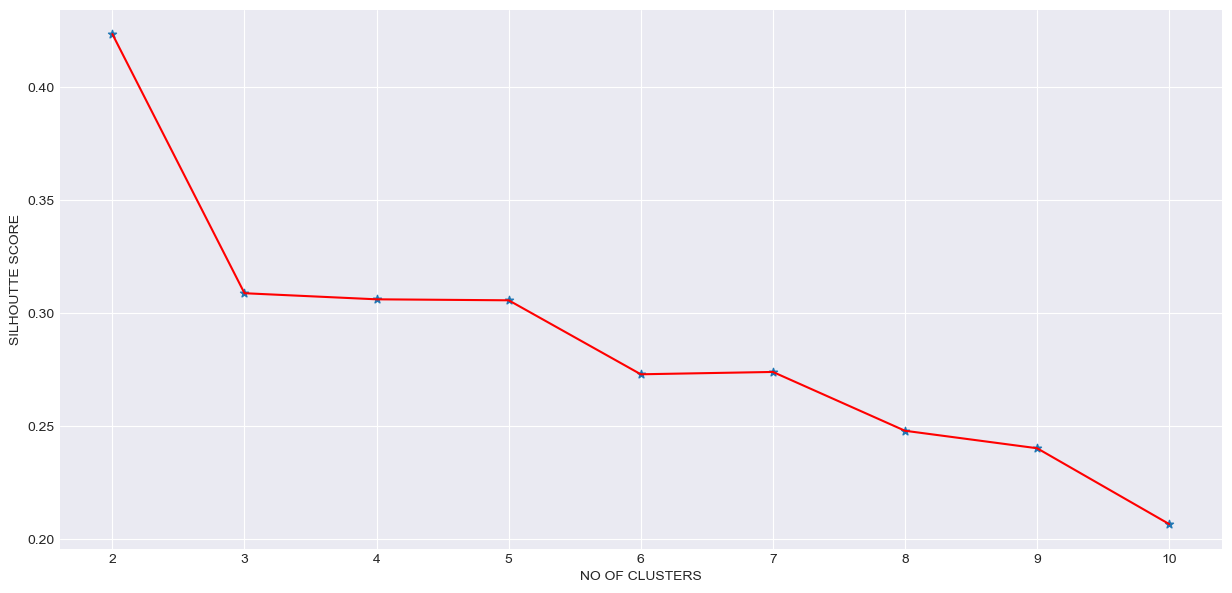

In [43]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

In [44]:
nc = range(2,11)
silscore = []

for i in nc:
    model=KMeans(n_clusters=i)
    model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,model.fit_predict(mmscaler)))

[0.42364457559625074,
 0.31705482042661864,
 0.3408903560074363,
 0.3041807251632637,
 0.27074591195713554,
 0.2487379970510877,
 0.254740777153603,
 0.23998374603955447,
 0.24314755640224683]

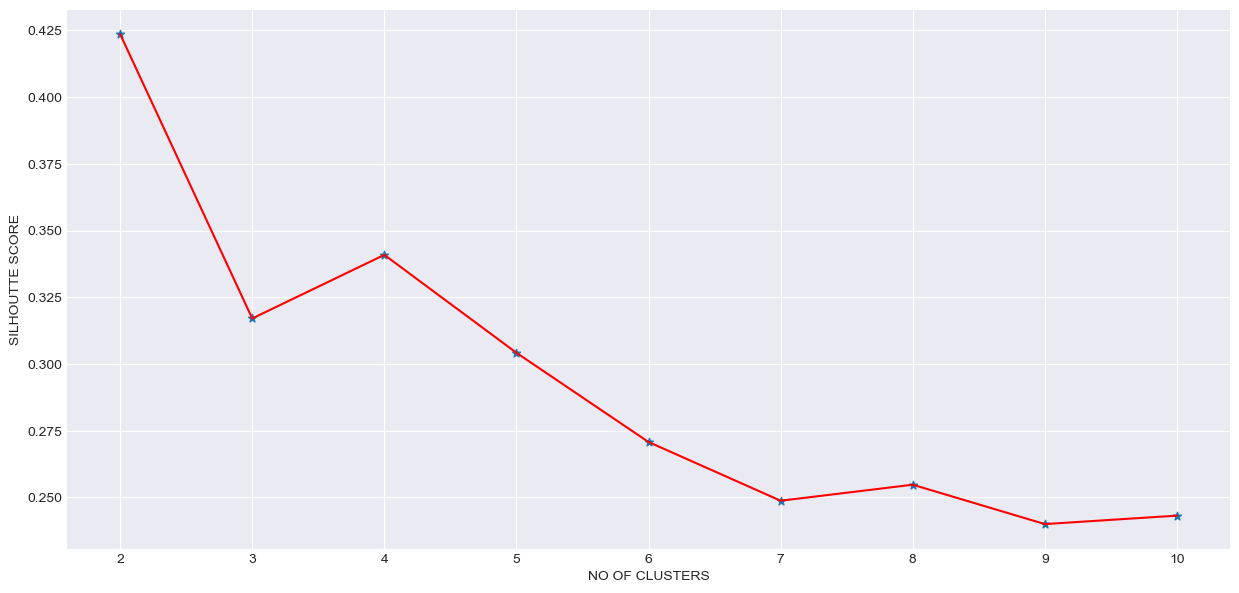

In [45]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

#  With l2 and average 

In [231]:
nc = range(2,11)
silscore = []

for i in nc:
    model2 = AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="average")
    #pred = model.fit_predict(scaled_features)
    silscore.append(silhouette_score(mmscaler,model2.fit_predict(mmscaler)))

[0.42364457559625074,
 0.35149572430421583,
 0.36992391140277175,
 0.32574781342555276,
 0.2815096427769604,
 0.2438299952807217,
 0.2506774565216012,
 0.2169454704716503,
 0.21877737263827401]

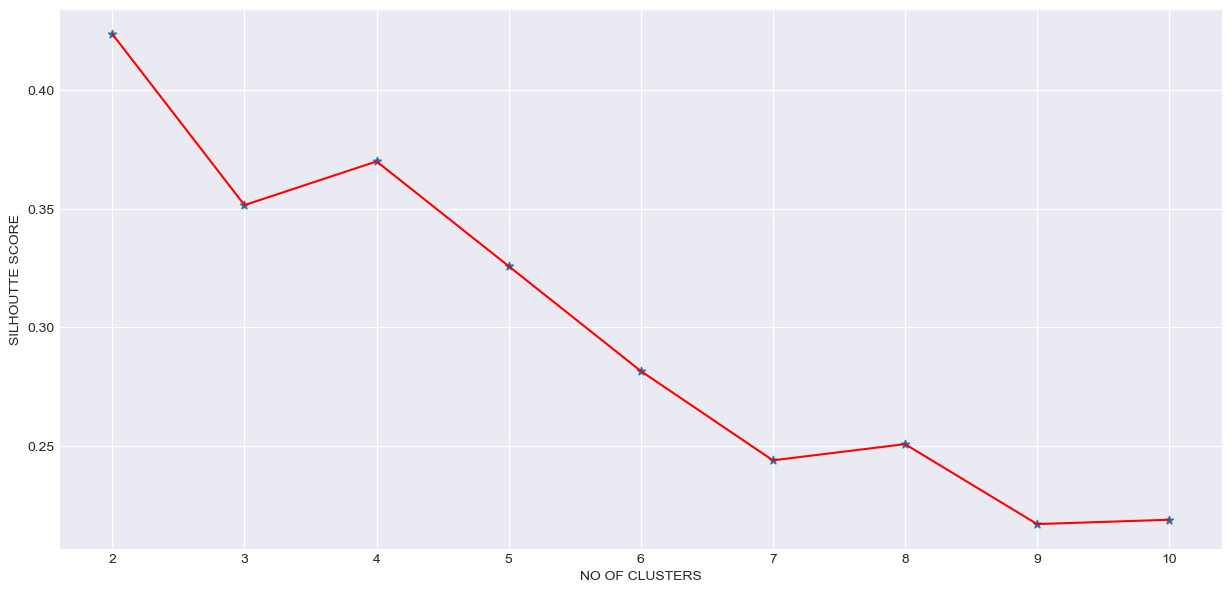

In [232]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

# With L1 and complete

In [46]:
nc = range(2,11)
silscore = []

for i in nc:
    model3 = AgglomerativeClustering(n_clusters=i,affinity="l1",linkage="complete")
    #pred = model.fit_predict(scaled_features)
    silscore.append(silhouette_score(mmscaler,model3.fit_predict(mmscaler)))

[0.42150616000142505,
 0.31748195817295777,
 0.3246882046136041,
 0.2856589857160643,
 0.23060241591245334,
 0.2237450913021125,
 0.20996972769488903,
 0.21558940186596334,
 0.217658838715968]

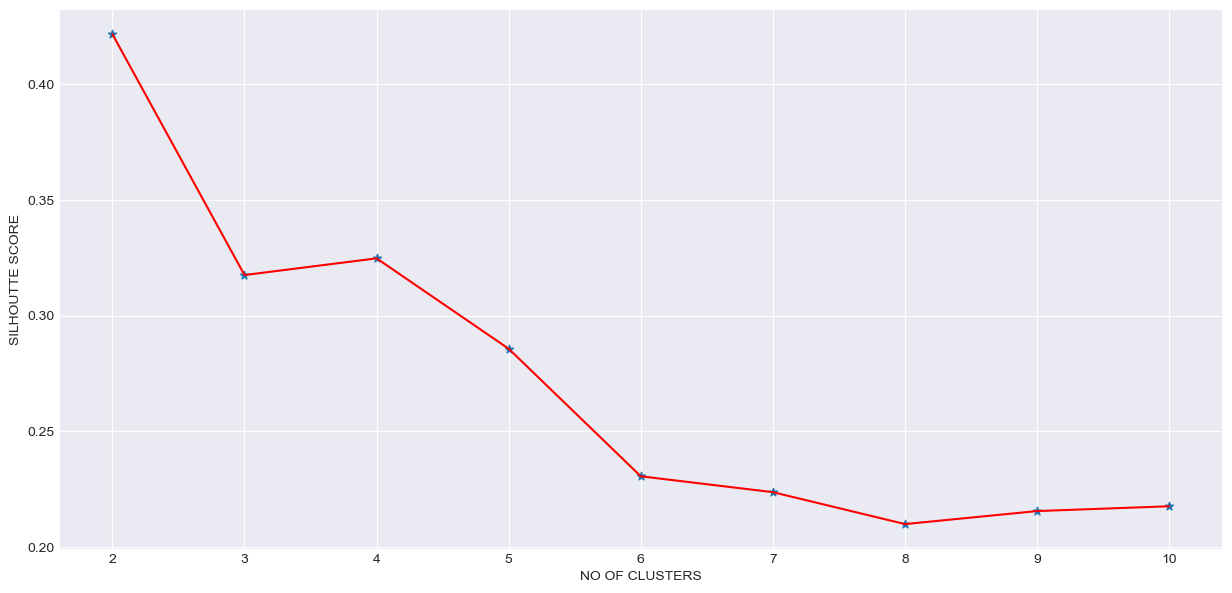

In [47]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

# With L1 and average

In [48]:
nc = range(2,11)
silscore = []

for i in nc:
    model4 = AgglomerativeClustering(n_clusters=i,affinity="l1",linkage="average")
    #pred = model.fit_predict(scaled_features)
    silscore.append(silhouette_score(mmscaler,model4.fit_predict(mmscaler)))

[0.42150616000142505,
 0.38059562824644055,
 0.3704827187736577,
 0.3198784461766775,
 0.3005225599232354,
 0.2800727866038942,
 0.27407610509248287,
 0.2525035359621213,
 0.24474886347671312]

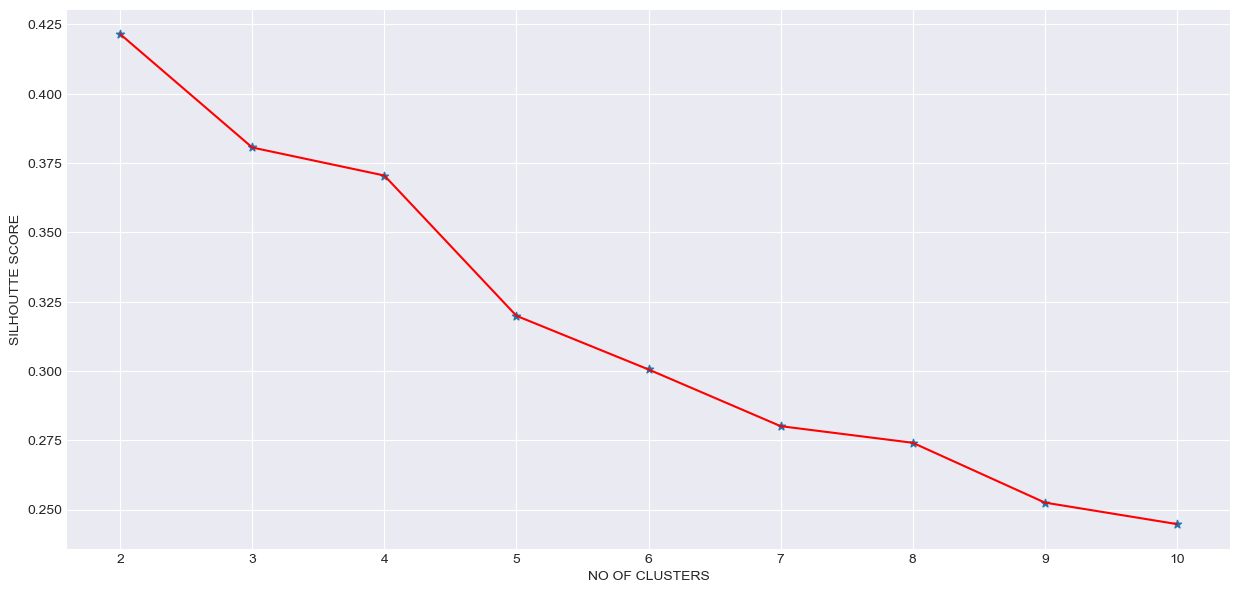

In [49]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

In [50]:
nc = range(2,11)
silscore = []

for i in nc:
    model5 = AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="average")
    #pred = model.fit_predict(scaled_features)
    silscore.append(silhouette_score(RobScaler,model5.fit_predict(RobScaler)))

[0.396395165918243,
 0.3433765772323092,
 0.34013097548615534,
 0.30825341941883794,
 0.3051288507197985,
 0.2948853598279646,
 0.2915151836079755,
 0.2859710626987273,
 0.2664971026879903]

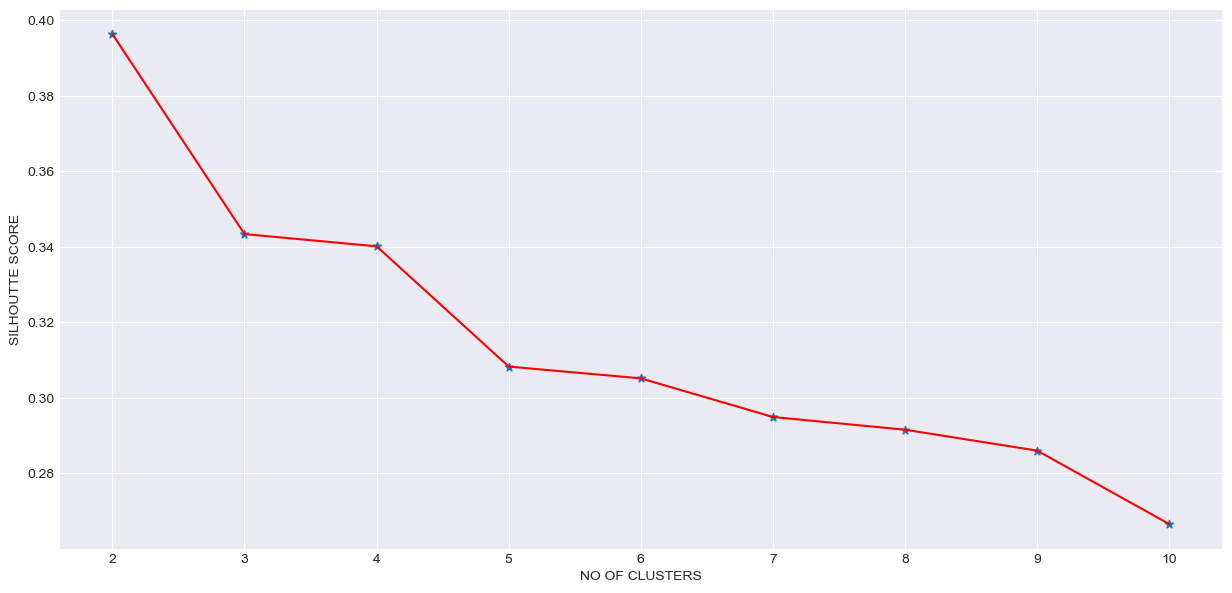

In [51]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

In [52]:
nc = range(2,11)
silscore = []

for i in nc:
    model6 = AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="average")
    #pred = model.fit_predict(scaled_features)
    silscore.append(silhouette_score(SScaler,model6.fit_predict(SScaler)))

[0.4084890326217641,
 0.34863679190476177,
 0.3636819420151221,
 0.3212682619092323,
 0.2719787783719339,
 0.2507421522912214,
 0.22076298935497143,
 0.20960529040521791,
 0.216106074828432]

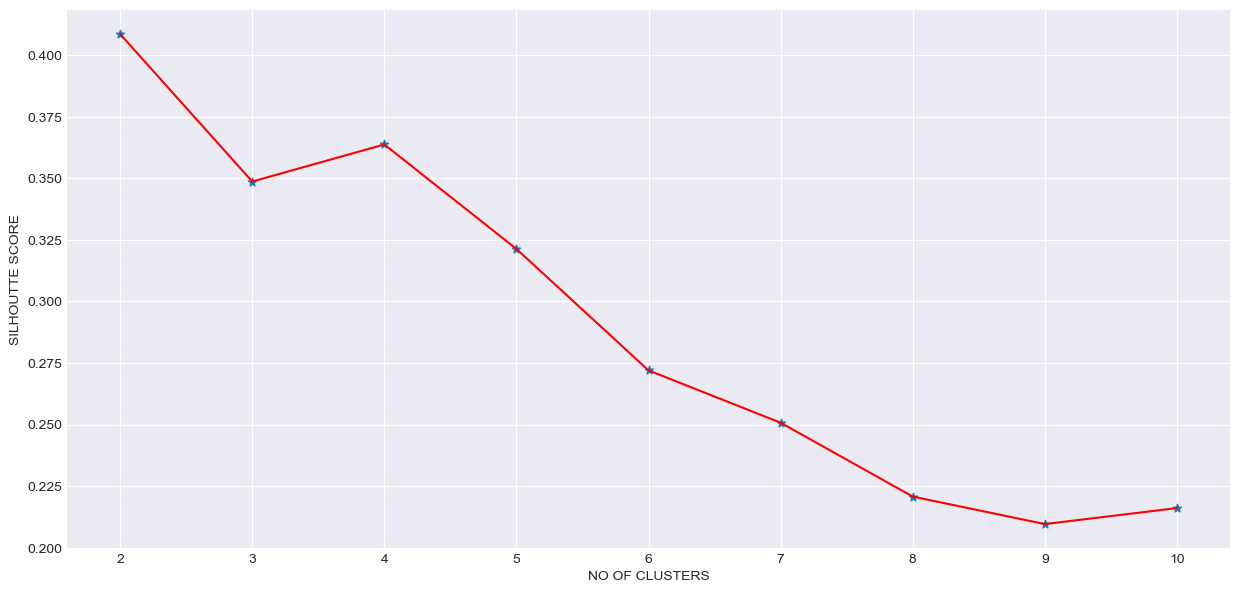

In [53]:
plt.figure(figsize=(15,7))
plt.plot(nc,silscore,c="r")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SILHOUTTE SCORE")
plt.scatter(nc,silscore,cmap=plt.cm.rainbow_r,marker="*")
silscore

FINAL INFERENCE :


MODEL2 = AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="average") : 

model2 with the mentioned attributes provides the silhouute score of 0.42364457559625074 , I have tried feature interaction with combining
assualt and rape columns : However even those does not provide a better score in agglomrative .

HOWEVER KNN BY USING ELBOW METHOD , YEILDED A BETTER MODEL WITH INERTIA BELOW 4 WITH 4 CLUSTERS WITH MINMAXSCALER



# DBSCAN USECASE

In [73]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [65]:
x,y=make_moons(100)

In [69]:
x

array([[-9.67294863e-01,  2.53654584e-01],
       [ 9.60230259e-02,  9.95379113e-01],
       [ 1.80141362e+00, -9.81105305e-02],
       [ 2.81650650e-01, -1.95682551e-01],
       [-8.01413622e-01,  5.98110530e-01],
       [ 2.38554042e-01, -1.48228395e-01],
       [-5.72116660e-01,  8.20172255e-01],
       [-8.38088105e-01,  5.45534901e-01],
       [ 9.91790014e-01,  1.27877162e-01],
       [-2.22520934e-01,  9.74927912e-01],
       [ 1.94905575e+00,  1.84891782e-01],
       [ 4.62538290e-01,  8.86599306e-01],
       [-5.18392568e-01,  8.55142763e-01],
       [ 1.83808810e+00, -4.55349012e-02],
       [ 1.84408430e-02,  3.08841371e-01],
       [ 4.04783343e-01,  9.14412623e-01],
       [ 8.38088105e-01,  5.45534901e-01],
       [ 1.03205158e+00, -4.99486216e-01],
       [ 1.40478334e+00, -4.14412623e-01],
       [ 9.90311321e-02,  6.61162609e-02],
       [-1.00000000e+00,  1.22464680e-16],
       [ 1.96729486e+00,  2.46345416e-01],
       [ 1.71834935e+00, -1.95682551e-01],
       [ 6.

In [66]:
x.shape

(100, 2)

In [67]:
y

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [68]:
y.shape

(100,)

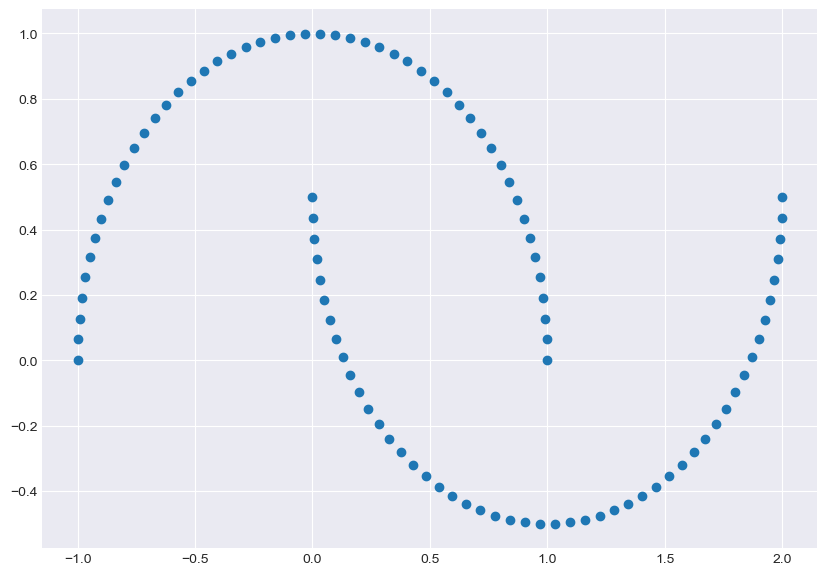

In [70]:
plt.figure(figsize=(10,7))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1])

In [75]:
modeldb = DBSCAN(min_samples=3,eps=0.5)
p = modeldb.fit_predict(x)

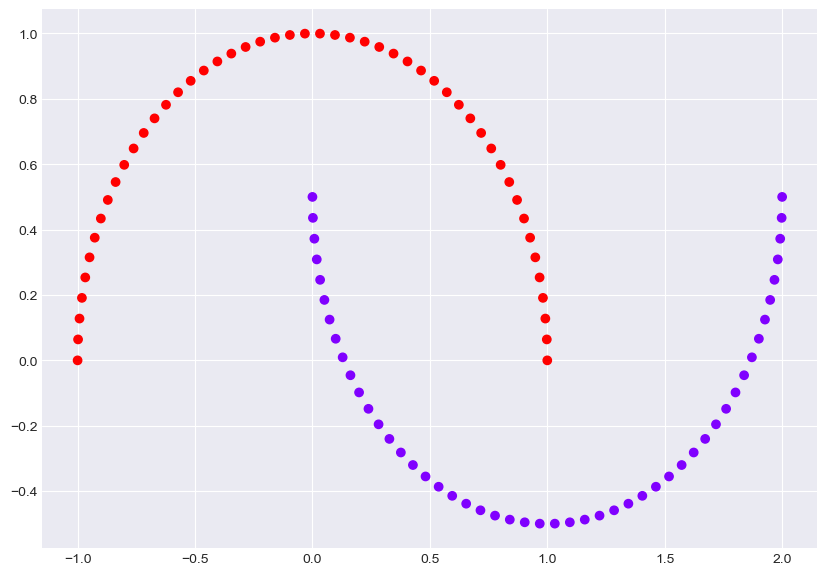

In [77]:
plt.figure(figsize=(10,7))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1], c= p , cmap = plt.cm.rainbow_r);

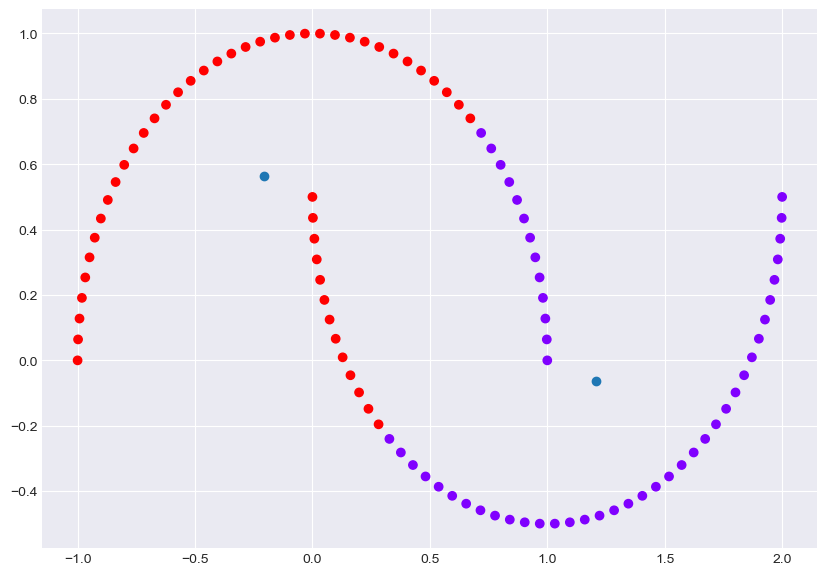

In [80]:
modelknn = KMeans(n_clusters=2)
knn= modelknn.fit_predict(x)

plt.figure(figsize=(10,7))
plt.scatter(x[:,0],x[:,1],c = knn,cmap = plt.cm.rainbow_r)
plt.scatter(modelknn.cluster_centers_[:,0],modelknn.cluster_centers_[:,1])

# KNN DOES NOT PERFORM GOOD HERE AS IT CONSIDER CLUSTERS THAT ARE CENTER TO THE DATA POINTS.

In [83]:
modelknn.cluster_centers_

array([[-0.20824586,  0.56410191],
       [ 1.20824586, -0.06410191]])

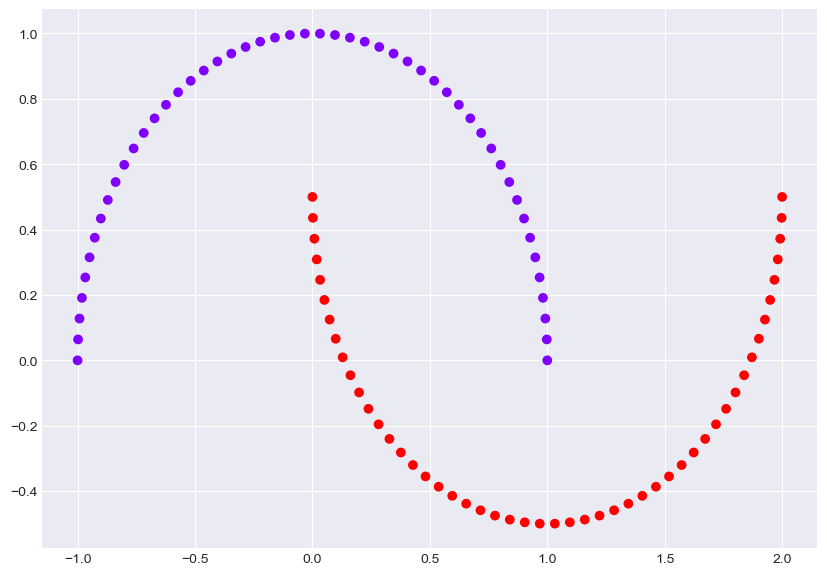

In [85]:
modelh=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="single")
h = modelh.fit_predict(x)
plt.figure(figsize=(10,7))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1],c=h,cmap=plt.cm.rainbow_r)

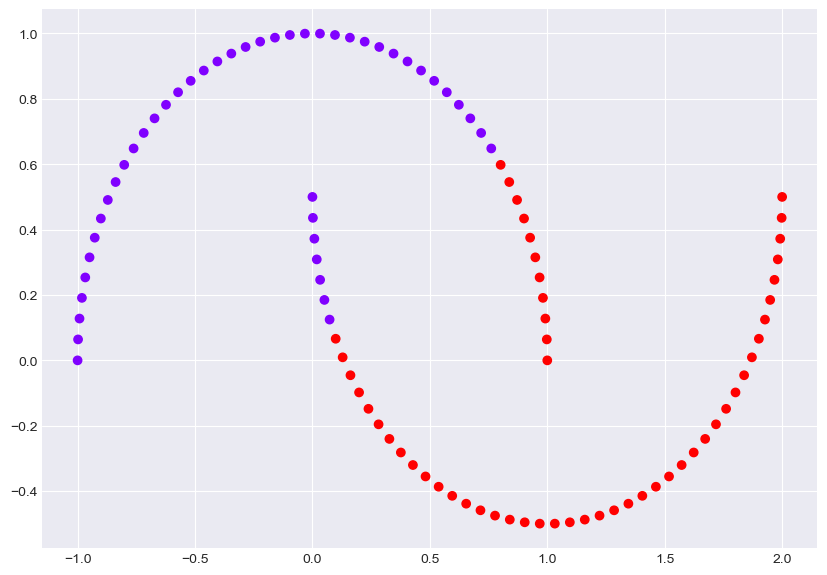

In [86]:


modelh2 =AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="complete")
h2 = modelh2.fit_predict(x)
plt.figure(figsize=(10,7))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1],c=h2,cmap=plt.cm.rainbow_r)


HOWEVER WITH THE COMBINATION OF L2 AND "COMPLETE LINKAGE" , THE HEIRARCHICAL CLUSTERING DOES NOT PERFORM WELL.

THUS WE PROCEED WITH THE COMBINATION OF L2 AND "SINGLE " LINKAGE FOR BETTER RESULTS 


#  AIRLINES DATASET

In [87]:
data = pd.read_csv("EastWestAirlines.csv")

In [88]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#  COLUMN DESCRIPTIONS 

ID --Unique ID  ( NOT REQUIRED FOR CLUSTERING)

Balance--Number of miles eligible for award travel  

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers,

HENCE WE CREATE CLUSTERS OF THE FEATURES :  'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award?' EXCEPT FOR ID ( AS ITS A UNIQUE NUMBER )

In [90]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [93]:
data.shape

(3999, 12)

In [94]:
data["ID#"].duplicated().value_counts()   #No duplicate values

False    3999
Name: ID#, dtype: int64

In [98]:
features = data.iloc[:,1:]

In [99]:
features.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<Axes: >

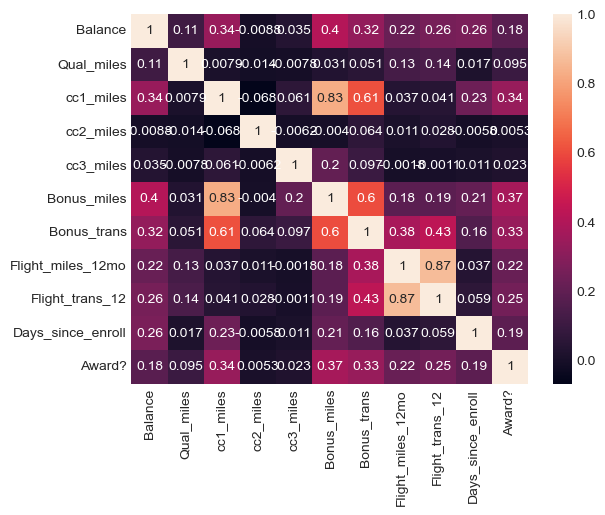

In [100]:
sns.heatmap(data = features.corr(),annot=True)

#Bonus miles and cc1_miles has high correlation
#Flight_trans_12 and Flight_trans_12	

As there are many features we must detect for the outliers .
we use boxplot for all columns and detect the same .



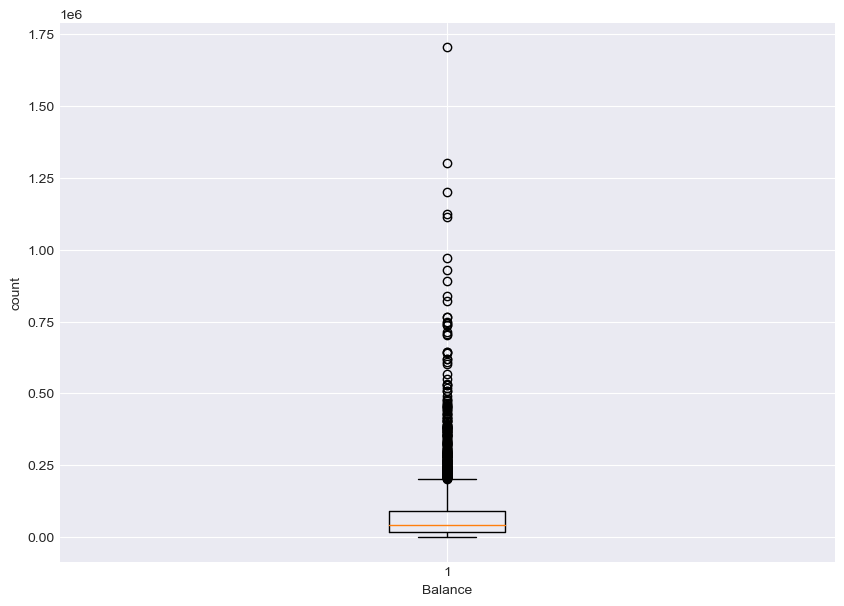

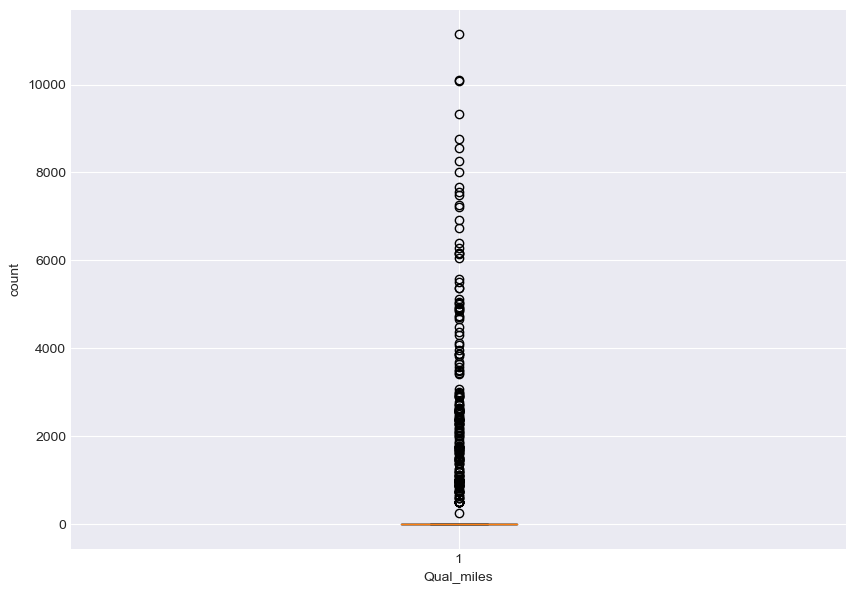

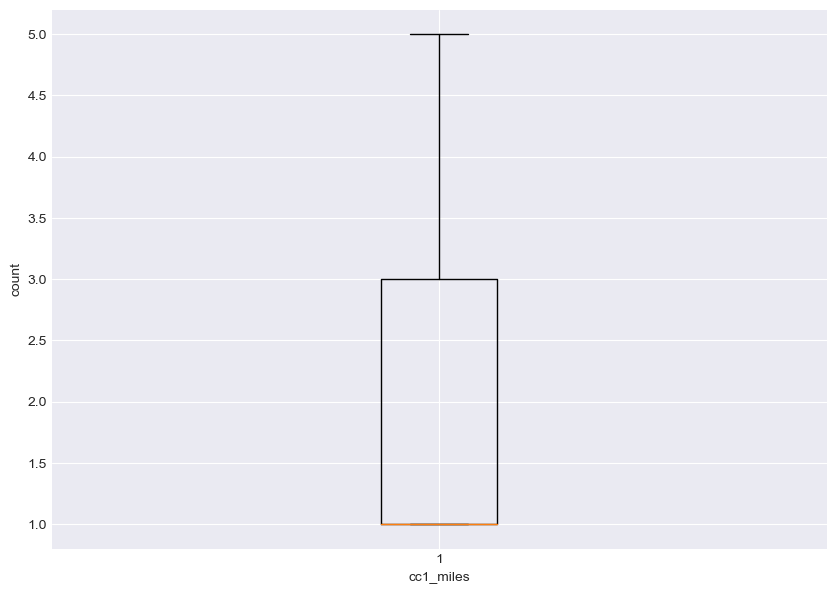

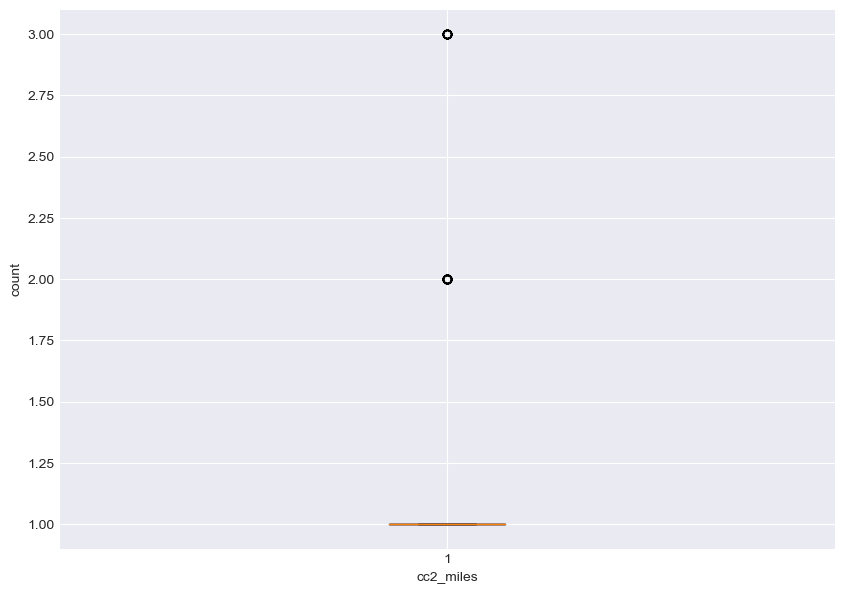

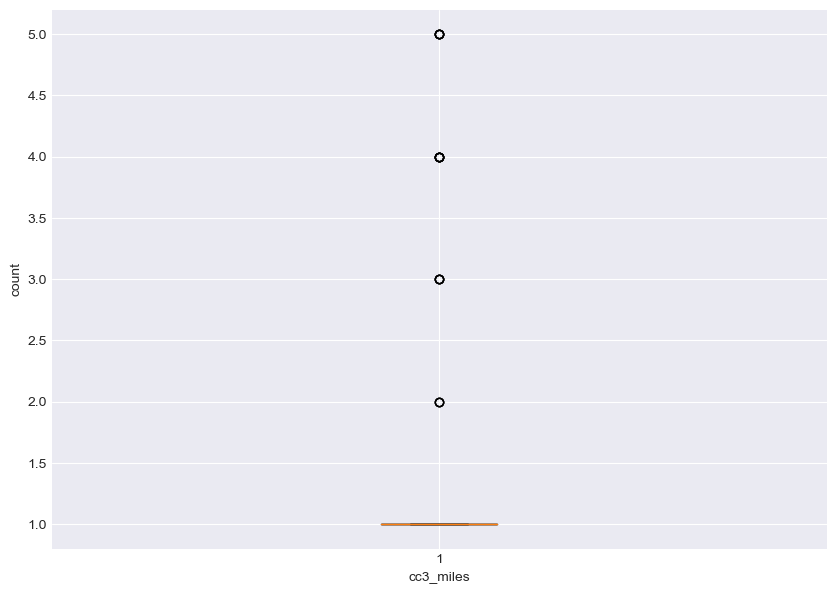

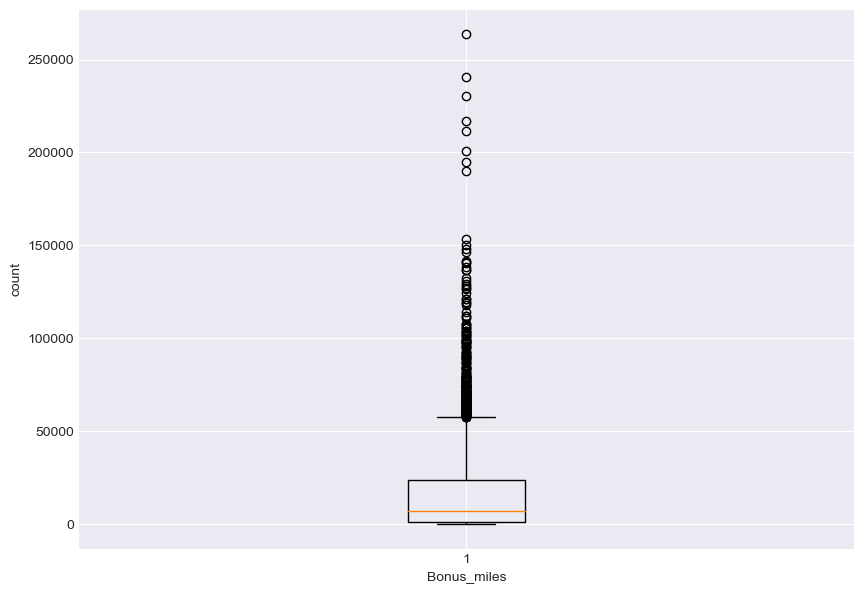

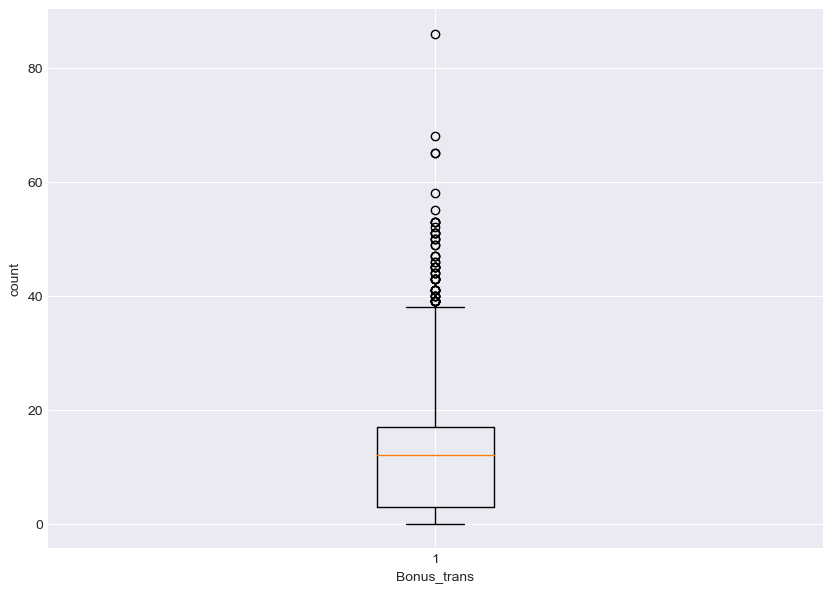

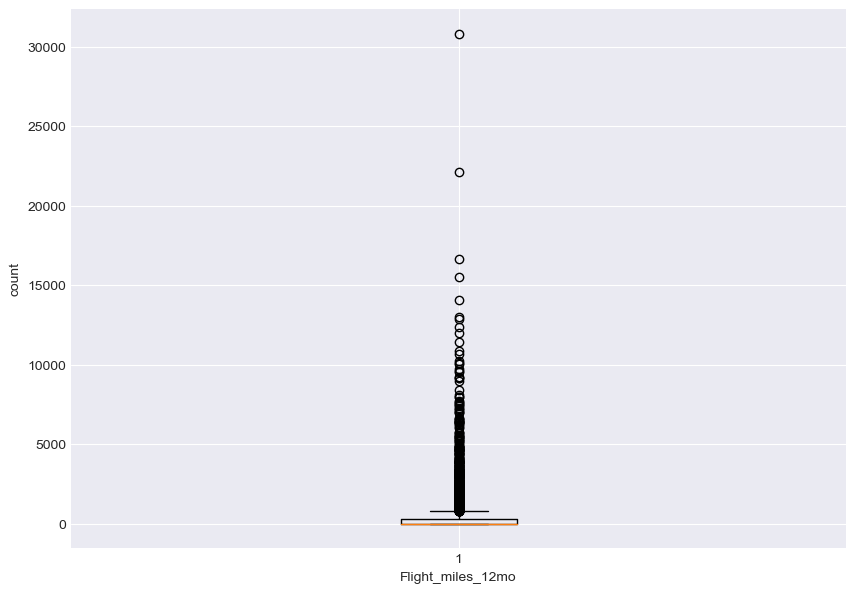

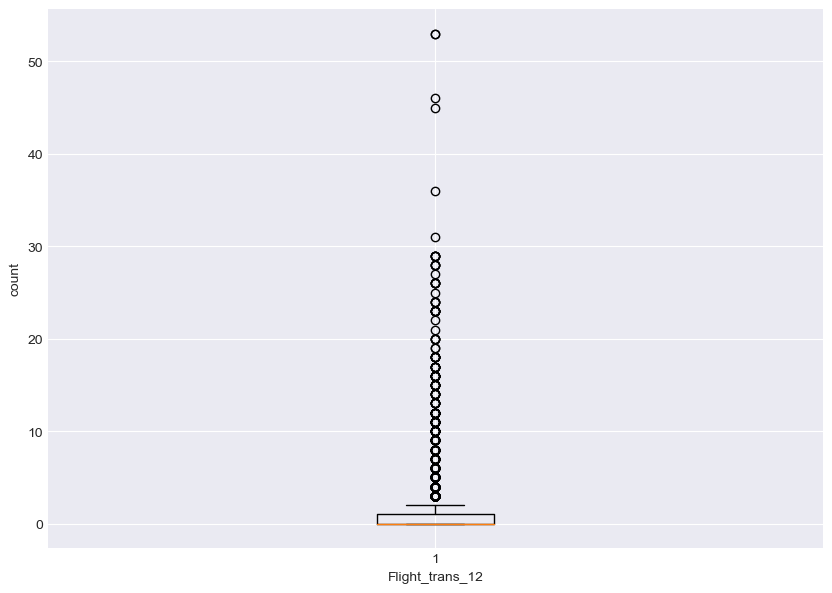

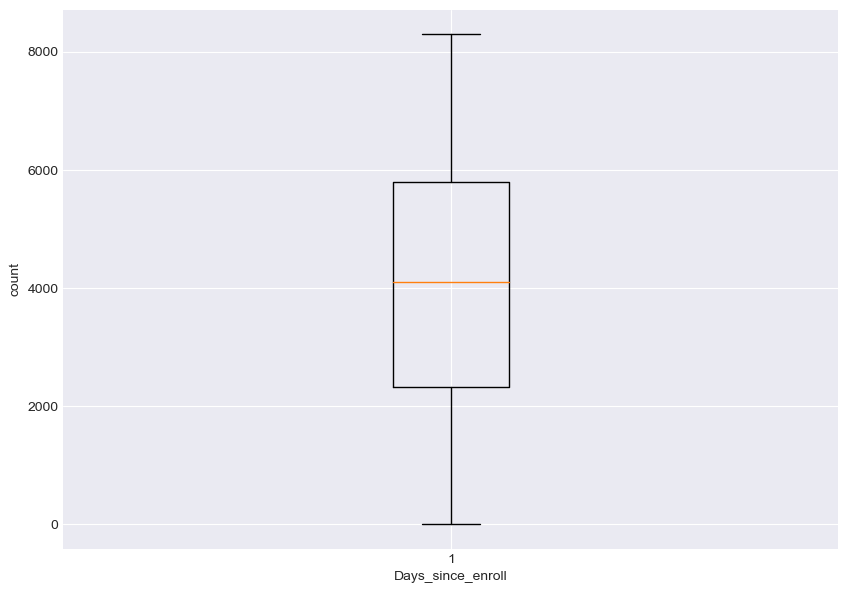

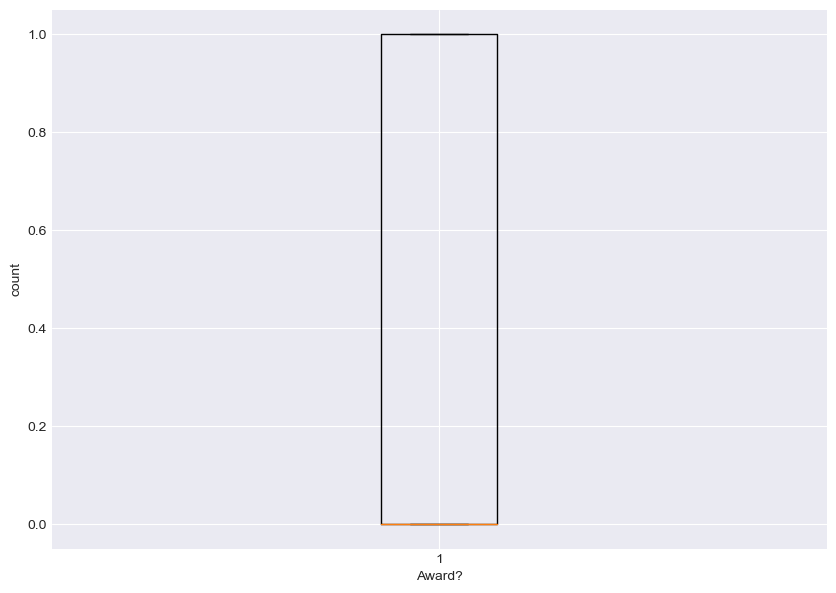

In [105]:
columns = list(features.columns)

for i in columns:
    plt.figure(figsize=(10,7))
    plt.boxplot(features[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    
    



There are potential outliers in Bonus miles  , Bonus Trans , Flight miles 12 mo , flight_trans_12, However as these are high 
in numbers treating them may result in misinterpretation of data.
 
Scaling can mitigate the impact of outliers to some extent, but it does not completely eliminate the issue of outliers. The extent to which scaling helps with outliers depends on the scaling method used and the distribution of your data

# SCALING

In [106]:
scaler = MinMaxScaler()
mmscaler = scaler.fit_transform(features)
print(mmscaler)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


# HIERARCHICAL CLUSTERING

In [108]:
model = AgglomerativeClustering(n_clusters=3 , affinity = "l2" ,linkage = "complete")
pred = model.fit_predict(mmscaler)


# Dendrogram

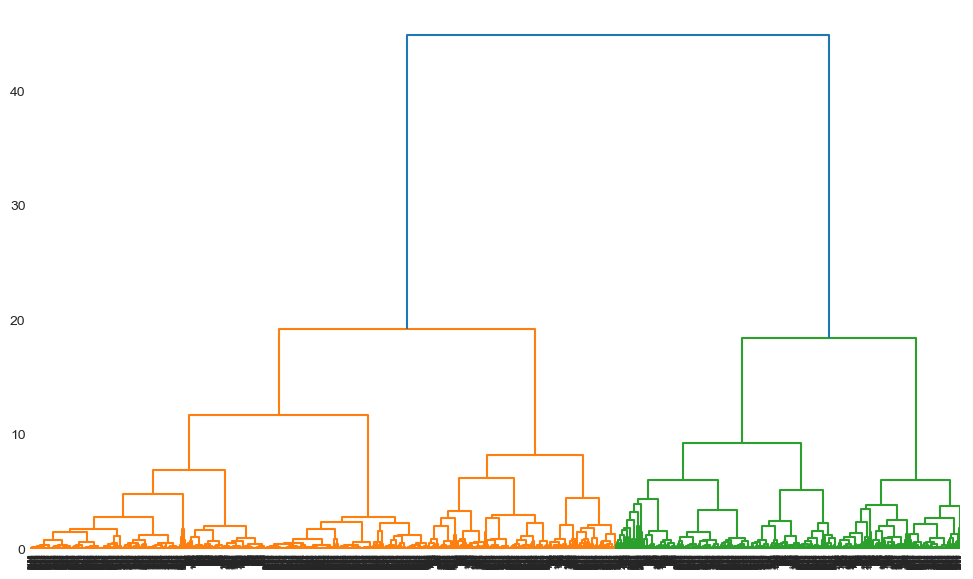

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist #Spatial distance refers to the measurement of the separation between two or more points in space.
from matplotlib import pyplot as plt

xdist=pdist(mmscaler,metric='euclidean')
linked=linkage(xdist,'ward')  #Ward's method : calculates the incremental sum of squares

plt.figure(figsize=(12,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)                        

plt.show()

# EVALUATION HEIRARCHICAL FOR BEST SILHOUTTE SCORE for L1 and Single

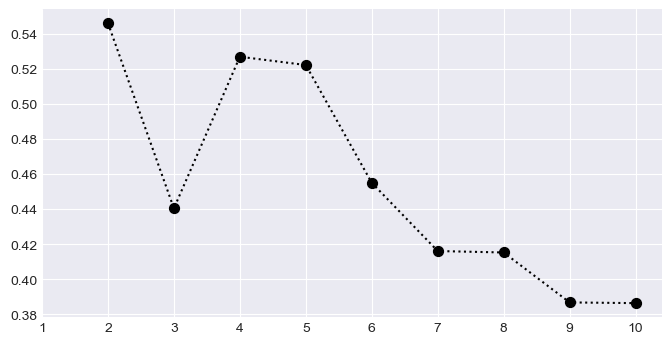

SILHOUTTE SCORE IS  0.5460574674055123


In [130]:
n =range(2,11)
silscore =[]
for i in n :
    model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='single')
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='black')
plt.plot(nc,silscore,color='black',linestyle=':')
plt.xticks(range(1,11))
plt.show();

print("SILHOUTTE SCORE IS ",max(silscore))

# EVALUATION HEIRARCHICAL FOR BEST SILHOUTTE SCORE for L2  and Single

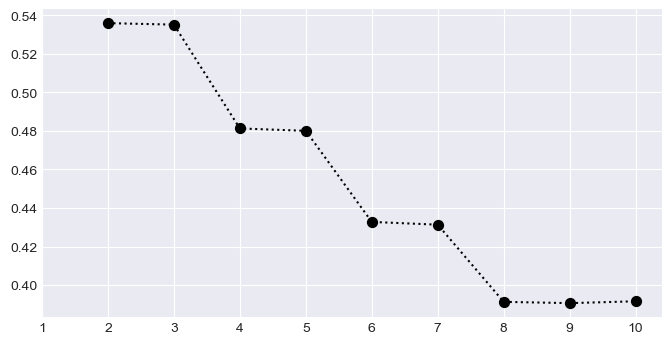

SILHOUTTE SCORE IS  0.535930510919477


In [131]:
n =range(2,11)
silscore =[]
for i in n :
    model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='single')
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='black')
plt.plot(nc,silscore,color='black',linestyle=':')
plt.xticks(range(1,11))
plt.show();

print("SILHOUTTE SCORE IS ",max(silscore))

# EVALUATION HEIRARCHICAL FOR BEST SILHOUTTE SCORE for L2  and AVERAGE

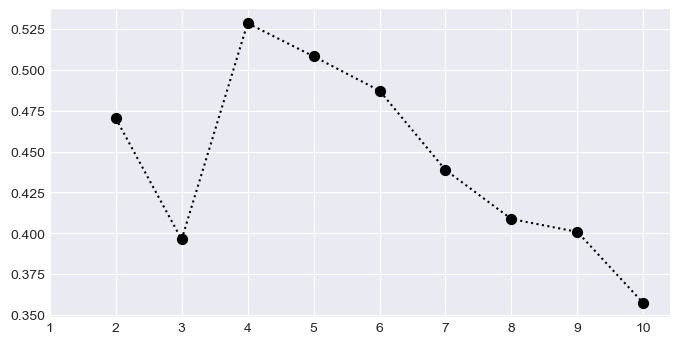

SILHOUTTE SCORE IS  0.5286018409871408


In [132]:
n =range(2,11)
silscore =[]
for i in n :
    model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='average')
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='black')
plt.plot(nc,silscore,color='black',linestyle=':')
plt.xticks(range(1,11))
plt.show();

print("SILHOUTTE SCORE IS ",max(silscore))

# EVALUATION HEIRARCHICAL FOR BEST SILHOUTTE SCORE for L2  and COMPLETE


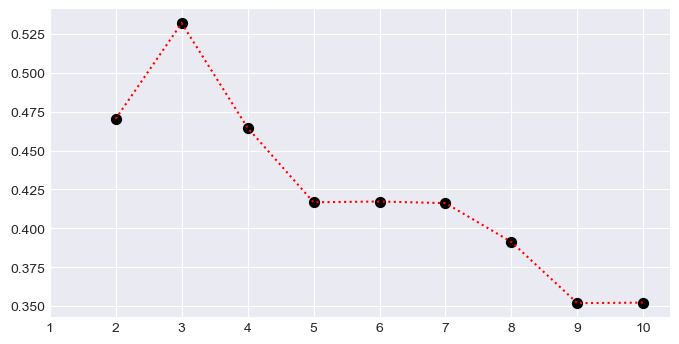

SILHOUTTE SCORE IS  0.5318787367232326


In [133]:
n =range(2,11)
silscore =[]
for i in n :
    model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='complete')
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='black')
plt.plot(nc,silscore,color='red',linestyle=':')
plt.xticks(range(1,11))
plt.show();

print("SILHOUTTE SCORE IS ",max(silscore))

THE BEST SILHHOUTTE SCORE OF 0.5460574674055123 was obtained for the model with hyper -parameters : affinity='l1',linkage='single'

# EVALUATION HEIRARCHICAL FOR BEST SILHOUTTE SCORE for L1  and COMPLETE


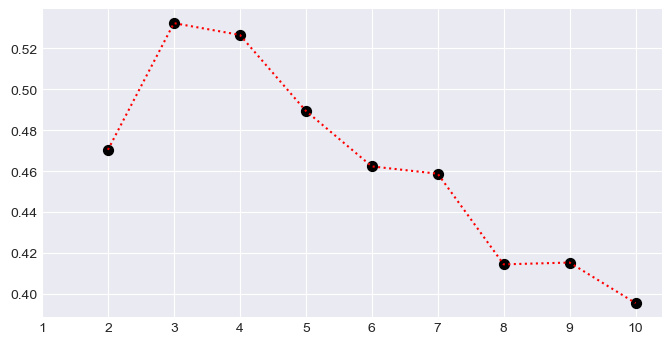

SILHOUTTE SCORE IS  0.5322330314764526


In [134]:
n =range(2,11)
silscore =[]
for i in n :
    model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='complete')
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='black')
plt.plot(nc,silscore,color='red',linestyle=':')
plt.xticks(range(1,11))
plt.show();

print("SILHOUTTE SCORE IS ",max(silscore))

# EVALUATION HEIRARCHICAL FOR BEST SILHOUTTE SCORE for L1  and AVERAGE

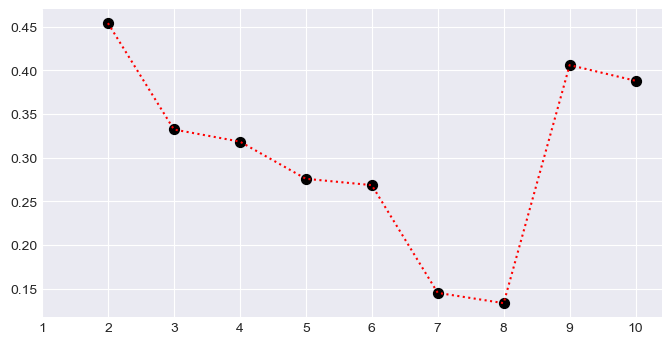

SILHOUTTE SCORE IS  0.45418920710462085


In [135]:
n =range(2,11)
silscore =[]
for i in n :
    model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='average')
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='black')
plt.plot(nc,silscore,color='red',linestyle=':')
plt.xticks(range(1,11))
plt.show();

print("SILHOUTTE SCORE IS ",max(silscore))

# K MEANS CLUSTERING

In [113]:
model = KMeans(n_clusters= 2)

In [114]:
pred = model.fit_predict(mmscaler)

In [118]:
model.cluster_centers_

array([[ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -4.99600361e-16],
       [ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00]])

# EVALUATION FOR BEST NO OF CLUSTERS USING ELBOW METHOD

In [121]:
inertia = []
for i in range(1,11):
        model = KMeans(n_clusters=i)
        pred = model.fit_predict(mmscaler)
        inertia.append(model.inertia_)

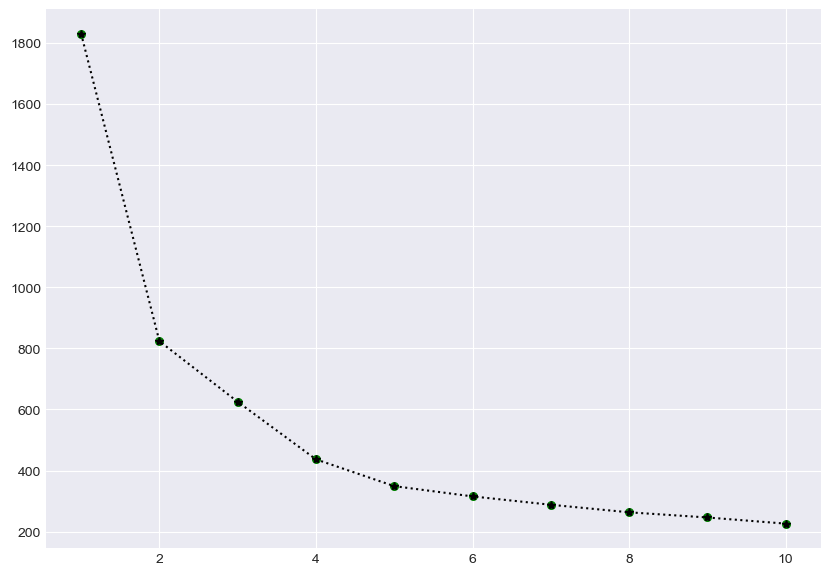

In [126]:
plt.figure(figsize=(10,7))
plt.scatter(range(1,11),inertia,s=30,c="green")
plt.plot(range(1,11),inertia,marker="*",c="black",linestyle=':');

In [ ]:
# DEAL NO OF CLUSTERS OF 2 WHERE THE INERTIA IS MINIMUM 

# EVALUATION OF KNN USING SILHOUTTE SCORE METHOD 


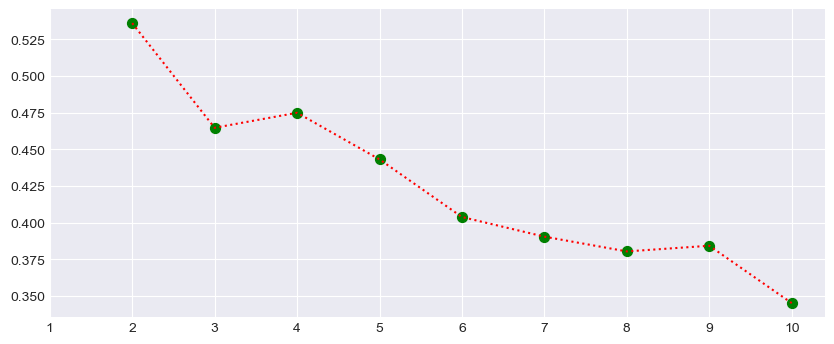

In [139]:
n = range(2,11)
silscore = []
for i in n:
    model = KMeans(n_clusters=i)
    pred = model.fit_predict(mmscaler)
    silscore.append(silhouette_score(mmscaler,pred))

#plotting
plt.figure(figsize=(10,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(n,silscore,s=50,color='green')
plt.plot(n,silscore,color='red',linestyle=':')
plt.xticks(range(1,11))
plt.show();
   

FOR EASTWEST AIRLINES DATA WE HAVE FORMED 2 CLUSTERS USING HEIRARCHICAL AND KMEANS ALOGORITHMN AND FORMED FEATURES WITH SIMILAR CHARACTERISTICS  , WE CANNOT PERFORM DBSCAN AS THE DATA HAS MULTIPLE FEATURES AND CANT PLOT MULTI DIMENSIONAL 